In [1]:
import numpy as np
from propagators import CR3BP
from read_ICs import read_ICs
from plot_trajectories import plot_trajectories
from dwell_times import hist_linear_density, altitude_blocks
# from scipy import integrate

ids = [25, 100, 150, 200, 400, 600]
tf, DRO_ICs = read_ICs(ids)
base_propagator = CR3BP(LU=389703, TU=382981)

inertial_states = []
CR3BP_states = []
times = []
for idx in range(len(ids)):
    base_propagator.propagate(DRO_ICs[idx, :], tf[idx])
    base_propagator.get_inertial_states()
    inertial_states.append(base_propagator.states)
    CR3BP_states.append(base_propagator.states_cr3bp)
    times.append(base_propagator.ts)

# Case 1: MEO Linear

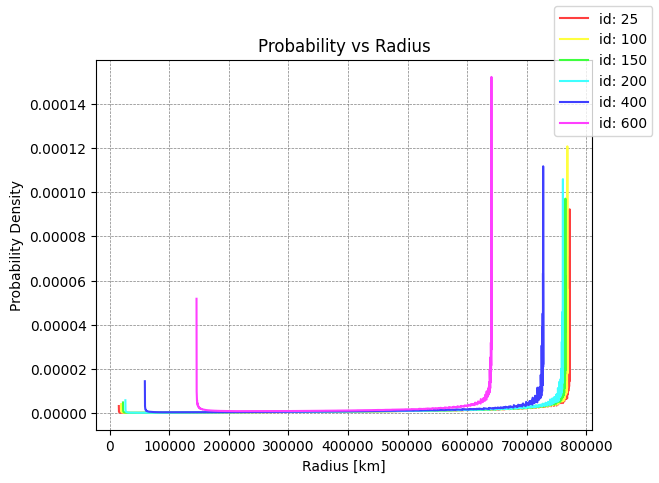

In [2]:
ps, alts = hist_linear_density(
    CR3BP_states,
    times,
    tf * base_propagator.TU,
    (-base_propagator.mu) * base_propagator.LU,
    ids,
    # alt_range=(0,2*base_propagator.LU),
)
alt_block = (20000 + 6371, 30000 + 6371)

pMEO_hist = []
for i in range(len(ids)):
    indices = (alts[i] >= alt_block[0]) * (alts[i] < alt_block[1])
    pMEO_hist.append(
        np.trapezoid(ps[i][indices], alts[i][indices])
    )
pMEO_altBlocks = altitude_blocks(
    CR3BP_states,
    times,
    tf * base_propagator.TU,
    (-base_propagator.mu) * base_propagator.LU,
    ids,
    {"LEO": alt_block},
)


In [3]:
pMEO_hist

[np.float64(0.0023574),
 np.float64(0.00272605),
 np.float64(0.0031999499999999996),
 np.float64(0.005198099999999997),
 np.float64(0.0),
 np.float64(0.0)]

In [4]:
pMEO_altBlocks

[{'LEO': np.float64(0.0023771443917257936)},
 {'LEO': np.float64(0.002733815247099385)},
 {'LEO': np.float64(0.0032405365425554142)},
 {'LEO': np.float64(0.005398518513313234)},
 {'LEO': np.float64(0.0)},
 {'LEO': np.float64(0.0)}]

# Case 2: MEO weighted by proximity to 12hr orbit
### Standard deviation of 10 km